In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Specify the path to the file
file_path = '/content/drive/My Drive/loan_data_2007_2014.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
display(loan_data.head())

<ipython-input-3-5e8edcfc8a16>:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
missing_value = ["N/a","na",np.nan]
loan_data = pd.read_csv(file_path,na_values=missing_value)

<ipython-input-5-c72aee552676>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path,na_values=missing_value)


In [ ]:
# Target Variable Unique Values.  Further investigation should be done into the "does not meet the credit policy" values
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

# Detecting NA N/A and na Values

In [ ]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
loan_data.isnull().any()

Unnamed: 0          False
id                  False
member_id           False
loan_amnt           False
funded_amnt         False
                    ...  
all_util             True
total_rev_hi_lim     True
inq_fi               True
total_cu_tl          True
inq_last_12m         True
Length: 75, dtype: bool

<Axes: >

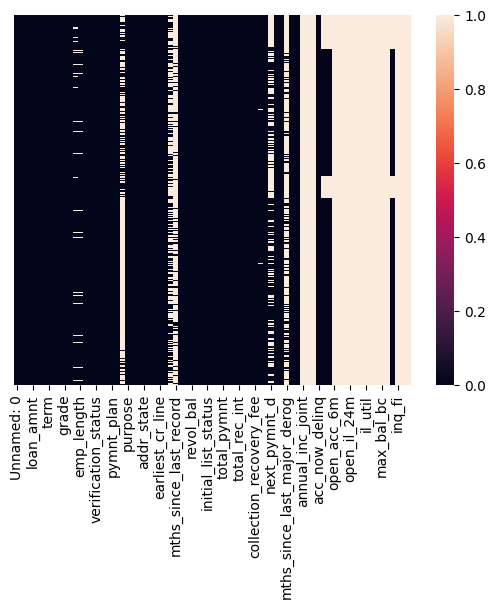

In [ ]:
sns.heatmap(loan_data.isnull(), yticklabels=False)

# Removing the Null values

In [ ]:
# filling null values using interpolation
loan_data['all_util'] = loan_data['all_util'].interpolate(method = 'linear')
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].interpolate(method = 'linear') # <= only this one is not ALL null
loan_data['inq_fi'] = loan_data['inq_fi'].interpolate(method = 'linear')
loan_data['total_cu_tl'] = loan_data['total_cu_tl'].interpolate(method = 'linear')
loan_data['inq_last_12m'] = loan_data['inq_last_12m'].interpolate(method = 'linear')

In [ ]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     42535
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
# Drop na Method
loan_data.dropna(how='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     42535
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
# Dropping columns with null values
loan_data = loan_data.dropna(axis=1, how='all')

In [ ]:
loan_data.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27592
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [ ]:
# Assuming 'loan_data' is the DataFrame
for column in ['emp_title', 'emp_length', 'desc', 'annual_inc', 'title', \
               'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', \
               'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', \
               'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', \
               'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']:
    # Check if the column is numerical or categorical
    if loan_data[column].dtype == 'object':
        # For categorical columns, replace missing values with the mode (most frequent value)
        mode_value = loan_data[column].mode()[0]
        loan_data[column].fillna(mode_value, inplace=True)
    else:
        # For numerical columns, consider if mode is the best choice, otherwise use mean or median
        # Here, we stick with mode as per your request, but consider the nature of your data
        mode_value = loan_data[column].mode()[0]
        loan_data[column].fillna(mode_value, inplace=True)


In [ ]:
loan_data.isnull().sum()

Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since

# Trasforming the data to gain valuable insights

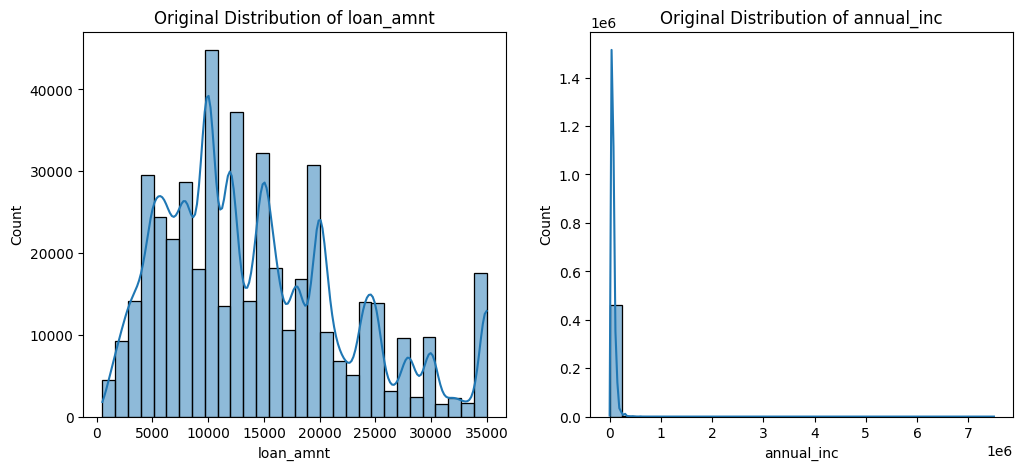

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Original Distribution of loan_amnt')
sns.histplot(loan_data['annual_inc'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Original Distribution of annual_inc')
plt.show()

## Using Normalization ie min-max scaling
#### Normalization scales the data to a fixed range, typically 0 to 1.

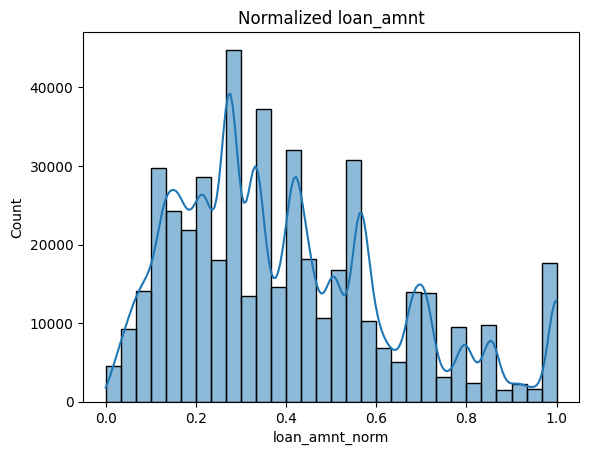

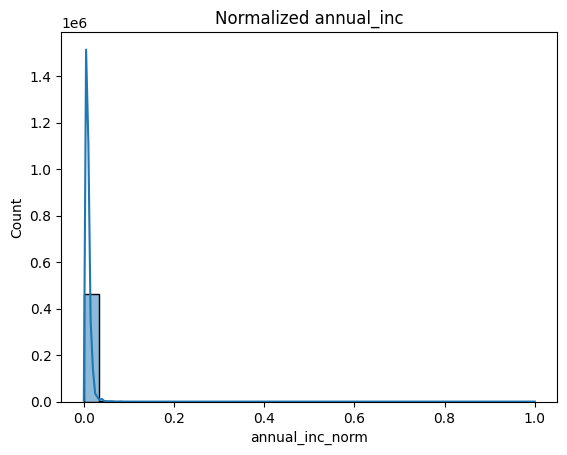

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
loan_data['loan_amnt_norm'] = scaler.fit_transform(loan_data[['loan_amnt']])
loan_data['annual_inc_norm'] = scaler.fit_transform(loan_data[['annual_inc']])

sns.histplot(loan_data['loan_amnt_norm'], bins=30, kde=True).set_title('Normalized loan_amnt')
plt.show()
sns.histplot(loan_data['annual_inc_norm'], bins=30, kde=True).set_title('Normalized annual_inc')
plt.show()


## Standardization
### Standardization rescales data to have a mean of 0 and a standard deviation of 1.

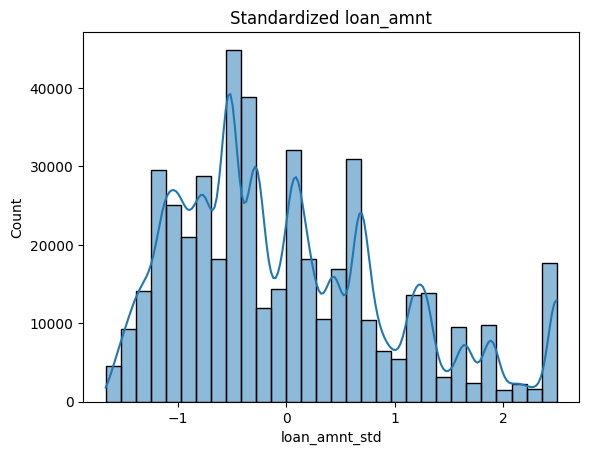

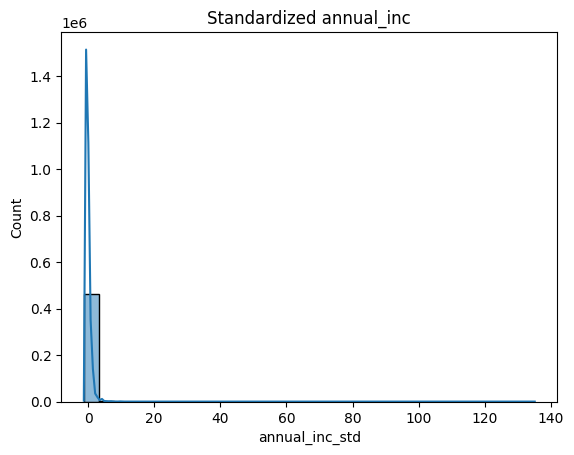

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
loan_data['loan_amnt_std'] = scaler.fit_transform(loan_data[['loan_amnt']])
loan_data['annual_inc_std'] = scaler.fit_transform(loan_data[['annual_inc']])

sns.histplot(loan_data['loan_amnt_std'], bins=30, kde=True).set_title('Standardized loan_amnt')
plt.show()
sns.histplot(loan_data['annual_inc_std'], bins=30, kde=True).set_title('Standardized annual_inc')
plt.show()


## Lof Tranformation
### Log transformation can help normalize skewed data

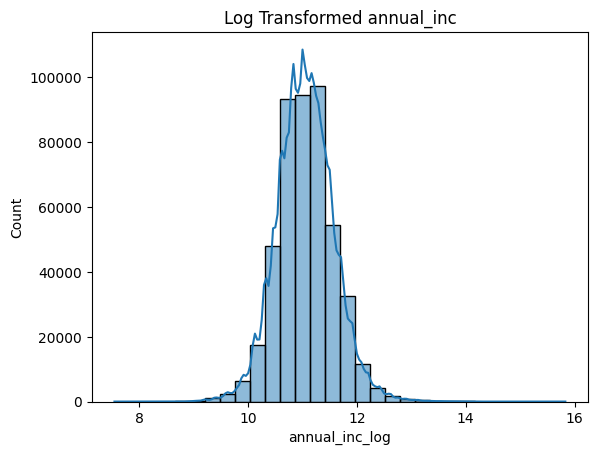

In [ ]:
loan_data['annual_inc_log'] = np.log1p(loan_data['annual_inc'])

sns.histplot(loan_data['annual_inc_log'], bins=30, kde=True).set_title('Log Transformed annual_inc')
plt.show()


## Binning
### Binning can catogorize continous variables into discrete categories

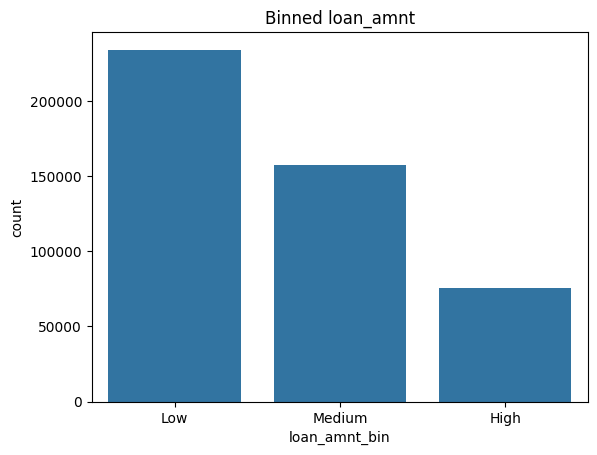

In [ ]:
loan_data['loan_amnt_bin'] = pd.cut(loan_data['loan_amnt'], bins=3, labels=["Low", "Medium", "High"])
sns.countplot(x='loan_amnt_bin', data=loan_data).set_title('Binned loan_amnt')
plt.show()


## Data Visualizations:

#### What is the distribution of loan status in the dataset?

<ipython-input-65-ee690f4f388a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set3')


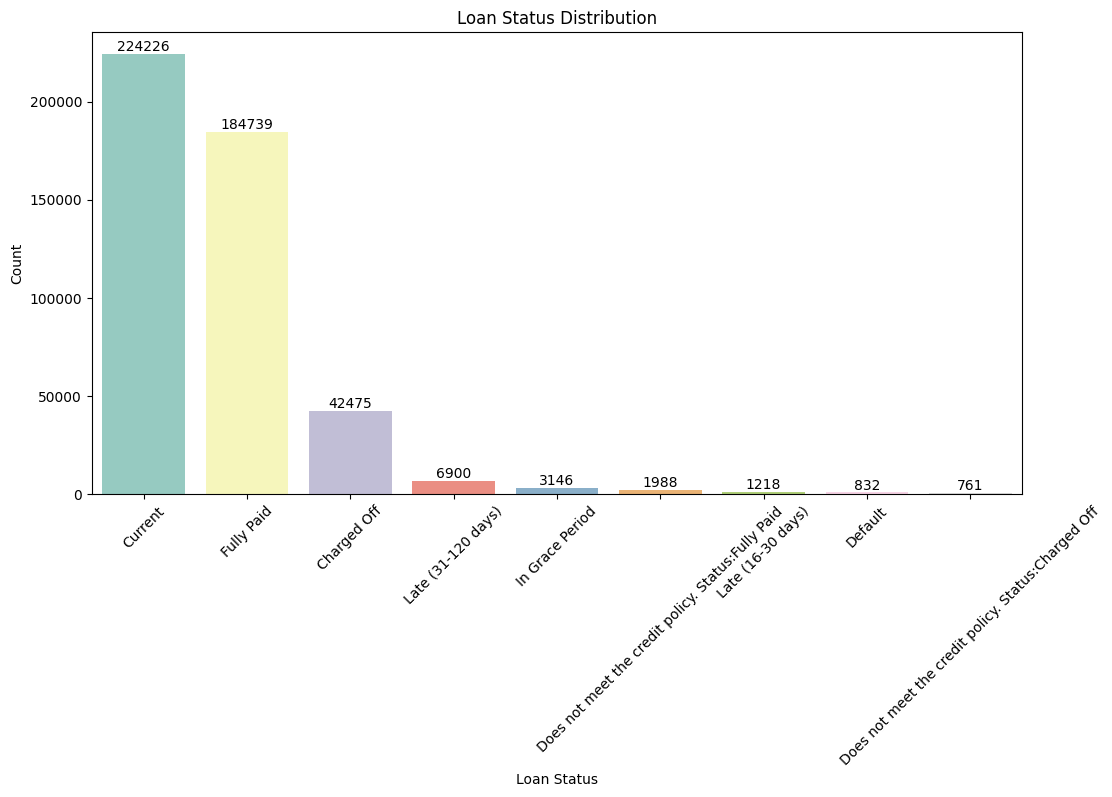

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for loan_status
counts = loan_data['loan_status'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values, palette='Set3')

plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

#### What are the proportions of different loan purposes?


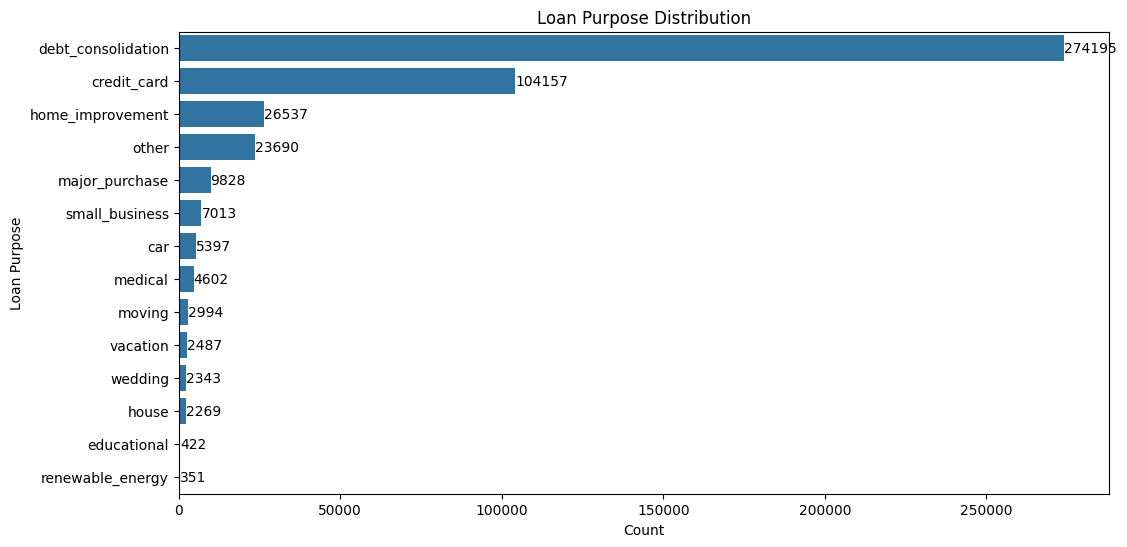

In [ ]:
# Calculate value counts for loan purpose
counts = loan_data['purpose'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', data=loan_data, order=loan_data['purpose'].value_counts().index)

plt.title('Loan Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(count + 0.1, i, str(count), ha='left', va='center')

plt.show()


#### How does the employment length affect the loan status?


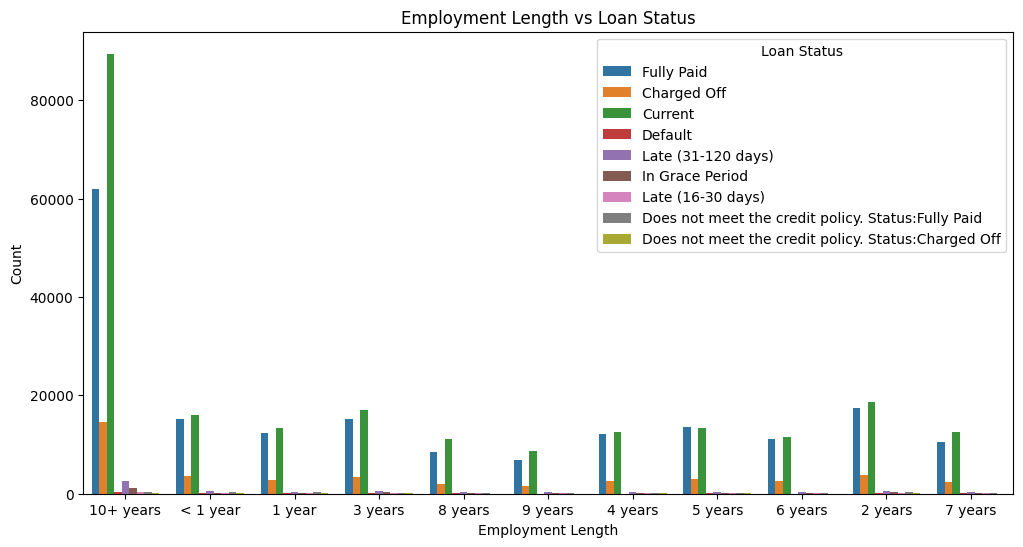

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)
plt.title('Employment Length vs Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


#### How does the interest rate vary across different loan purposes?


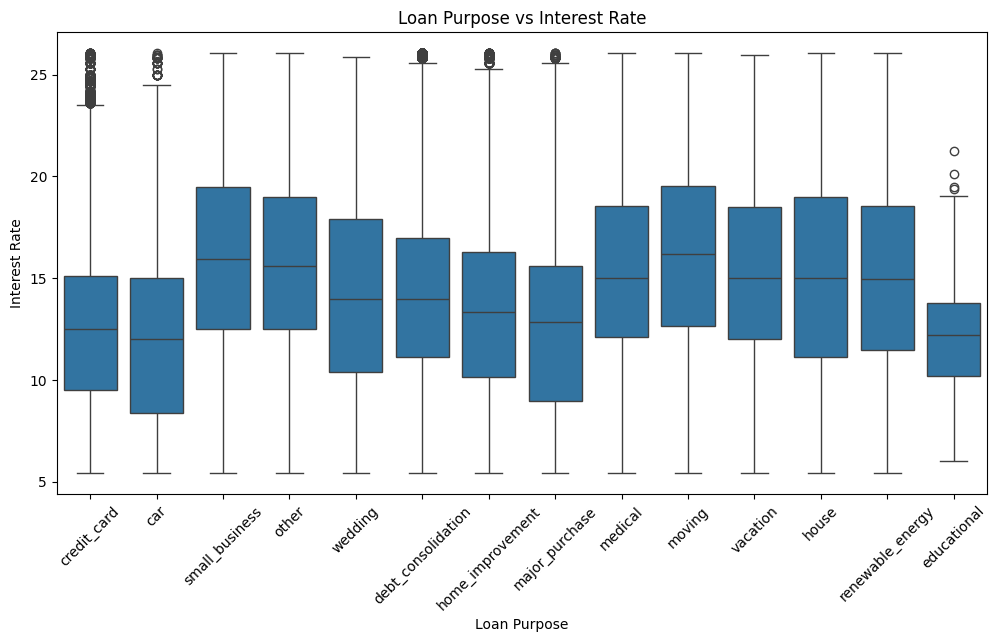

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='int_rate', data=loan_data)
plt.title('Loan Purpose vs Interest Rate')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()


#### Is there a relationship between loan amount and interest rate?


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


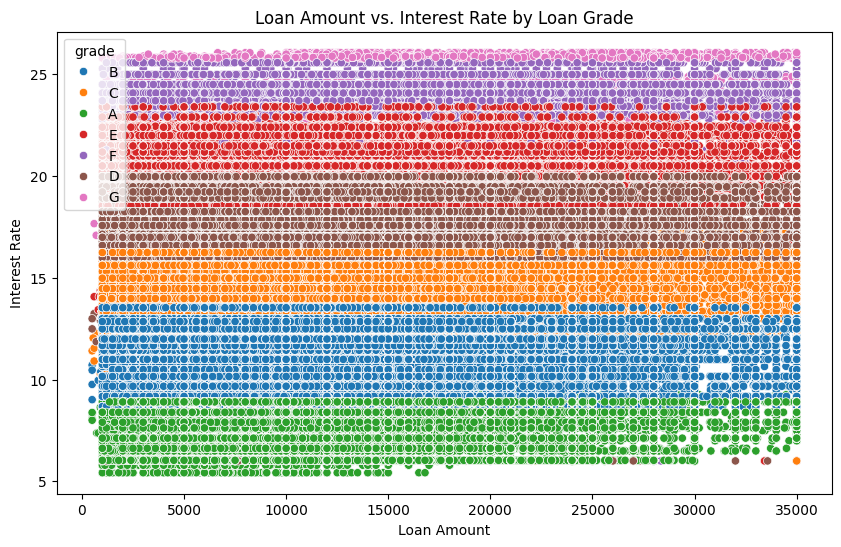

In [ ]:
# Loan Amount vs. Interest Rate by Loan Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='grade', data=loan_data)
plt.title('Loan Amount vs. Interest Rate by Loan Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


#### How does the loan status vary across different loan grades?


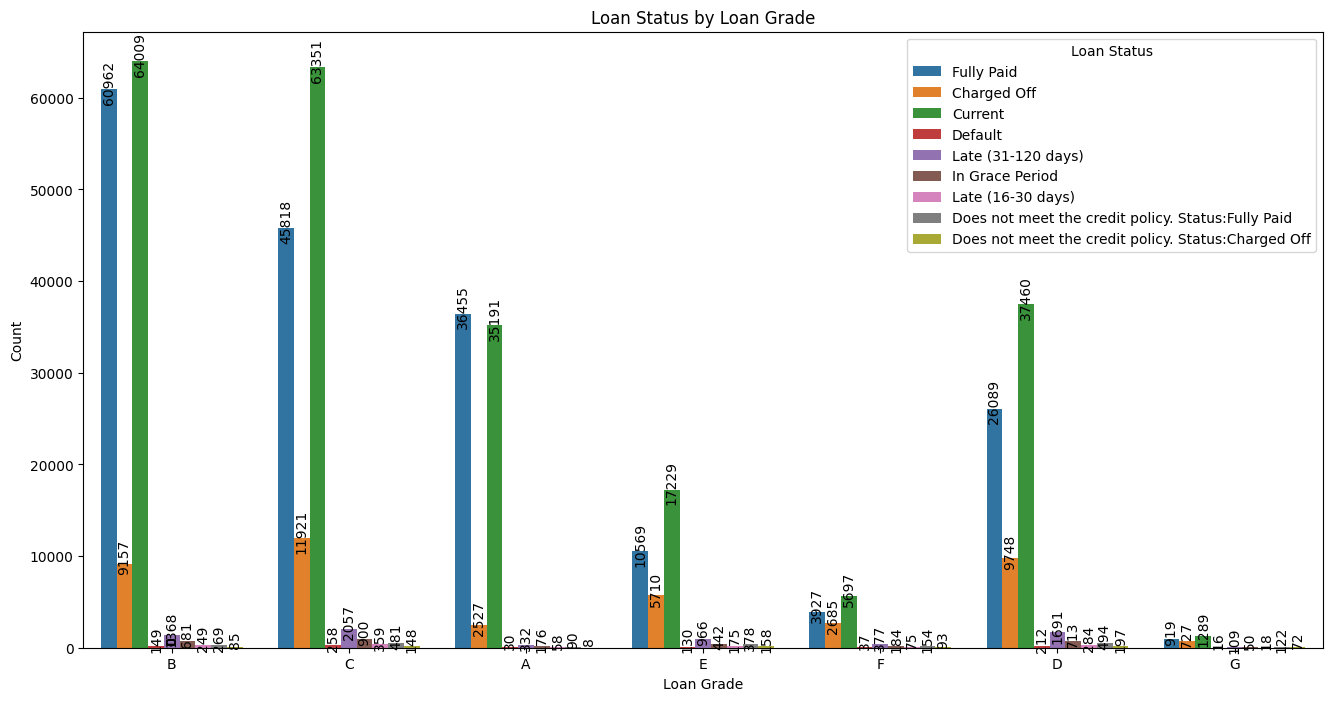

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='grade', hue='loan_status', data=loan_data)

plt.title('Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Manually annotate each bar with its count
for p in ax.patches:
    height = p.get_height() if p.get_height() == p.get_height() else 0 # Handle NaN values
    ax.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points', rotation = 'vertical')

plt.show()

#### What is the distribution of loan amounts for different verification statuses?


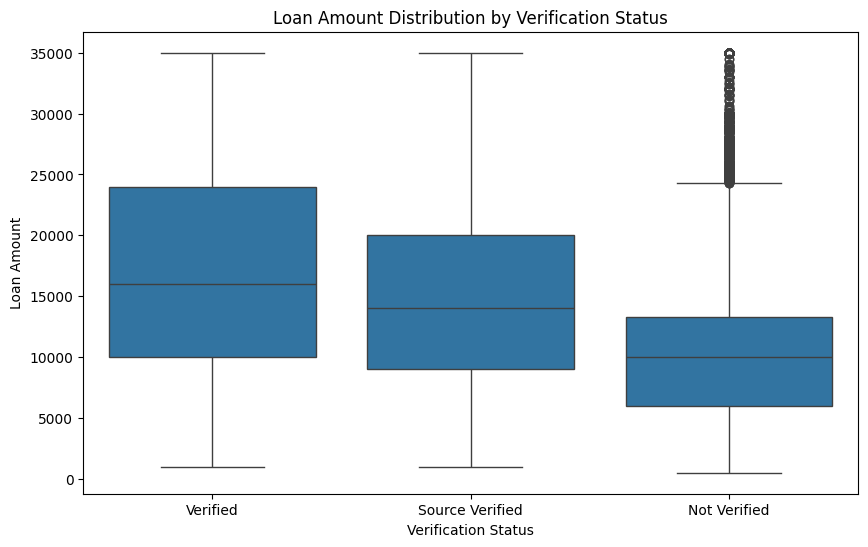

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='verification_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.show()


#### Loan Amount vs Annual Income by Loan Status




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


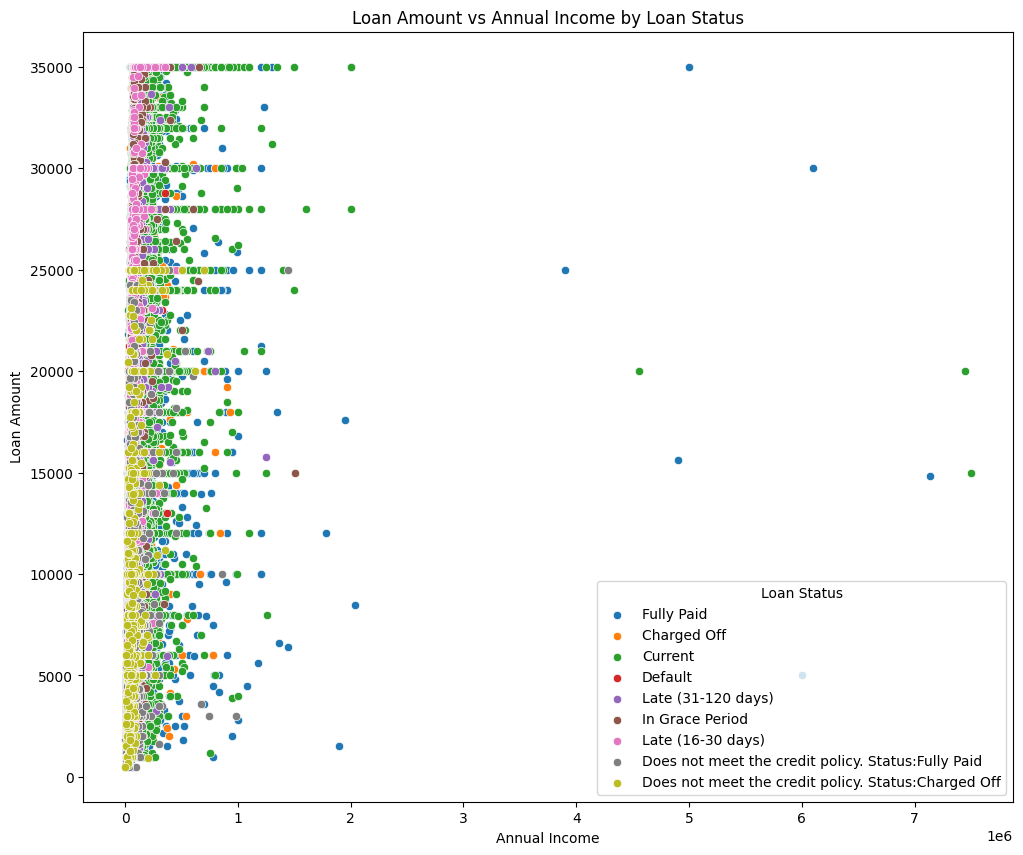

In [ ]:
plt.figure(figsize=(12, 8))

# Create separate scatter plots for each loan status
for status in loan_data['loan_status'].unique():
    status_data = loan_data[loan_data['loan_status'] == status]
    sns.scatterplot(x='annual_inc', y='loan_amnt', data=status_data, label=status)

plt.title('Loan Amount vs Annual Income by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()



#### What is the distribution of debt-to-income ratio for different loan statuses?






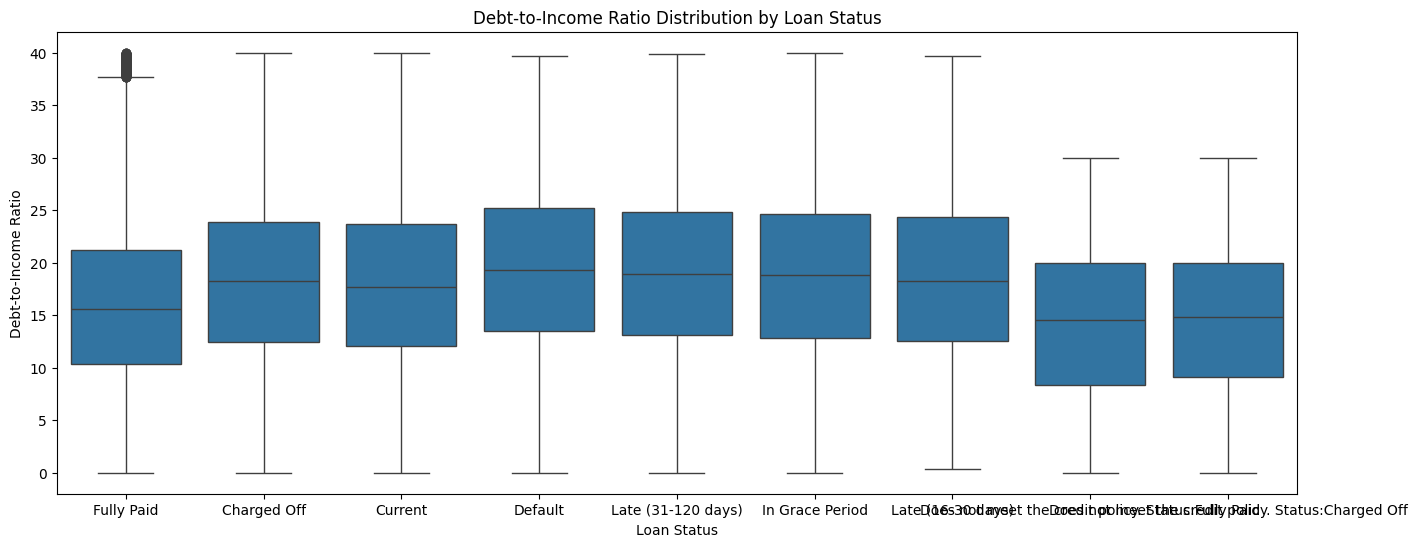

In [ ]:
plt.figure(figsize= (16 , 6))
sns.boxplot(x='loan_status', y='dti', data=loan_data)
plt.title('Debt-to-Income Ratio Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()
